You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

* Use Pandas to import the data from epa-sea-level.csv.
* Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
* Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot


    # Create first line of best fit


    # Create second line of best fit


    # Add labels and title

    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

In [10]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [41]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


Text(0.5, 1.0, 'Rise in Sea Level')

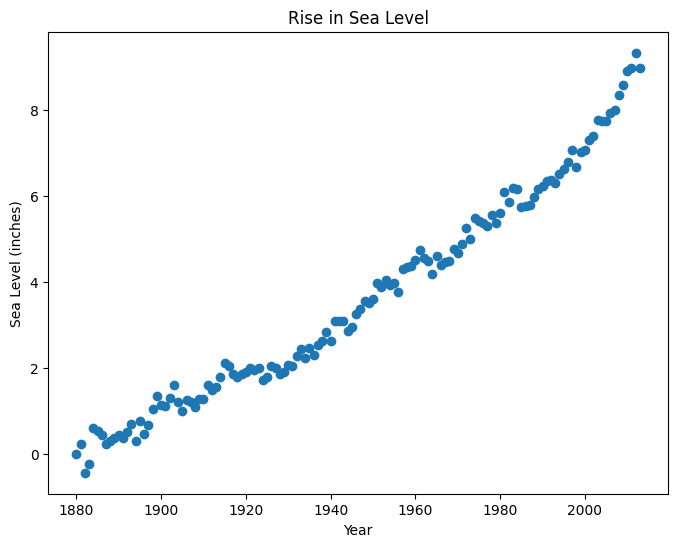

In [17]:
# Create scatter plot
#   Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
df_scatter = df.copy()

fig, ax = plt.subplots(figsize=(8, 6))

plt.scatter(data= df_scatter, x= 'Year', y= 'CSIRO Adjusted Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')


Text(0.5, 1.0, 'Rise in Sea Level')

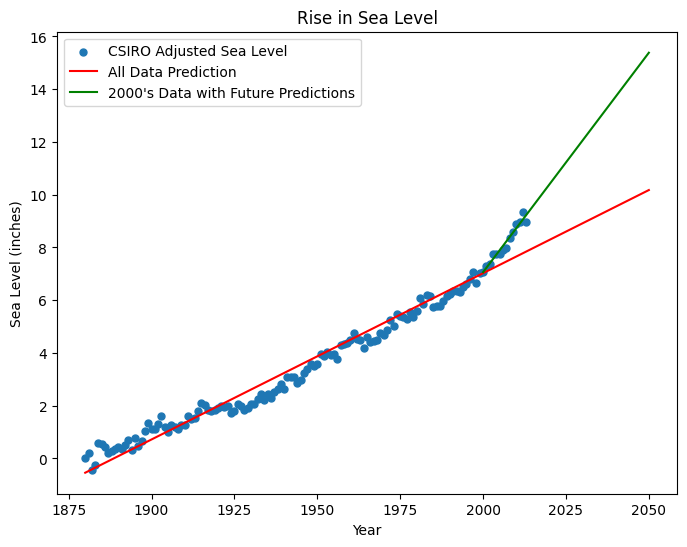

In [52]:
from scipy import stats   
import numpy as np
fig, ax = plt.subplots(figsize=(8, 6))
#    Create first line of best fit
x= df_scatter['Year']
y= df_scatter['CSIRO Adjusted Sea Level']

#   Extended years so that the prediction can go on past data
years_extended = np.arange(1880, 2051)
years_2000_to_2050 = np.arange(2000, 2051)

# Creating the plot(s)
reg = stats.linregress(x, y)
predicted_sea_levels = reg.intercept + reg.slope * years_extended

markersize = 100
plt.scatter(x, y, label= 'CSIRO Adjusted Sea Level', marker='.', s= markersize)
#plt.plot(x, reg.intercept + reg.slope * x, 'r', label= 'Prediction')
plt.plot(years_extended, predicted_sea_levels, 'r', label= 'All Data Prediction')

newx = df_scatter[df_scatter['Year'] >= 2000]['Year']
newy = df_scatter[df_scatter['Year'] >= 2000]['CSIRO Adjusted Sea Level']
newreg = stats.linregress(newx, newy)
new_predict = newreg.intercept + newreg.slope * years_2000_to_2050

plt.plot(years_2000_to_2050, new_predict, 'g', label= "2000's Data with Future Predictions")

# Labels and Legends
plt.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')